In [2]:
#test julia is running in a Jupyter notebook
versioninfo()
#print working directory
pwd()

Julia Version 1.11.5
Commit 760b2e5b73 (2025-04-14 06:53 UTC)
Build Info:
  Official https://julialang.org/ release
Platform Info:
  OS: Windows (x86_64-w64-mingw32)
  CPU: 16 × 13th Gen Intel(R) Core(TM) i5-13400
  WORD_SIZE: 64
  LLVM: libLLVM-16.0.6 (ORCJIT, goldmont)
Threads: 1 default, 0 interactive, 1 GC (on 16 virtual cores)


"c:\\Users\\ratta\\OneDrive - Prince of Songkla University\\PSU Lectures\\240-316 Experiencing Advance Technologies in Computer Engineering\\ws_julia"

In [ ]:
# 1. please locate prompt to your working directory
# 2. Create and activate working environment
import Pkg
Pkg.activate(".")                               # . is a current directory
Pkg.instantiate()                               # Create a Project.toml and Manifest.toml file
Pkg.add(["Plots", "DataFrames", "CSV"])         # add packages to the environment
Pkg.status()                                    # check installed packages
# load packages with using command
using Plots, DataFrames, CSV

  Activating project at `c:\Users\ratta\OneDrive - Prince of Songkla University\PSU Lectures\240-316 Experiencing Advance Technologies in Computer Engineering\ws_julia`
   Resolving package versions...
  No Changes to `C:\Users\ratta\OneDrive - Prince of Songkla University\PSU Lectures\240-316 Experiencing Advance Technologies in Computer Engineering\ws_julia\Project.toml`
  No Changes to `C:\Users\ratta\OneDrive - Prince of Songkla University\PSU Lectures\240-316 Experiencing Advance Technologies in Computer Engineering\ws_julia\Manifest.toml`


Status `C:\Users\ratta\OneDrive - Prince of Songkla University\PSU Lectures\240-316 Experiencing Advance Technologies in Computer Engineering\ws_julia\Project.toml`
  [336ed68f] CSV v0.10.15
  [a93c6f00] DataFrames v1.7.0
  [91a5bcdd] Plots v1.40.13


In [108]:
# Load Iris dataset (iris.csv) into DataFrames
df = DataFrame(CSV.File("iris.csv"))
# Display the first 5 rows of the DataFram
first(df, 5)

Row,sepal_length,sepal_width,petal_length,petal_width,variety
,Float64,Float64,Float64,Float64,String15
1,5.1,3.5,1.4,0.2,Setosa
2,4.9,3.0,1.4,0.2,Setosa
3,4.7,3.2,1.3,0.2,Setosa
4,4.6,3.1,1.5,0.2,Setosa
5,5.0,3.6,1.4,0.2,Setosa


In [ ]:
# Descriptive statistics for df
describe(df)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,DataType
1,sepal_length,5.84333,4.3,5.8,7.9,0,Float64
2,sepal_width,3.05733,2.0,3.0,4.4,0,Float64
3,petal_length,3.758,1.0,4.35,6.9,0,Float64
4,petal_width,1.19933,0.1,1.3,2.5,0,Float64
5,species,,Setosa,,Virginica,0,String15


In [109]:
#rename columns from variety into species
rename!(df, :variety => :species)
# Display the first few rows of the DataFrame
first(df, 5)

Row,sepal_length,sepal_width,petal_length,petal_width,species
,Float64,Float64,Float64,Float64,String15
1,5.1,3.5,1.4,0.2,Setosa
2,4.9,3.0,1.4,0.2,Setosa
3,4.7,3.2,1.3,0.2,Setosa
4,4.6,3.1,1.5,0.2,Setosa
5,5.0,3.6,1.4,0.2,Setosa


In [ ]:
# split df into 3 DataFrames by :species using groupby
df2 = DataFrames.groupby(df, :species)        # :species is a Symbol
first(df2[1],3)                               # Julia is a 1-based index, so df2[1] is the first group

# @show is a julia macro that prints the value of following expression
@show size(df2)                 # size of df2
@show size(df2[1])              # size of first group in df2
# @show df2    
@show nrow(df2[1])              # count rows in first group

size(df2) = (3,)
size(df2[1]) = (50, 5)
nrow(df2[1]) = 50


50

In [ ]:
# sort! is a in-place sort, modifies DataFrames directly
# sort :sepal_length column in ascending order
sort!(df2[1], :sepal_length, rev=false);                # rev is true for descending order (revert order)
df2_1_sorted = sort(df2[1], :sepal_length, rev=false)   # sort first group by sepal_length

@show first(df2_1_sorted, 8)
@show first(df2[1], 8);                                 # display first 110 rows of first group

# String15 is a type for strings with a maximum length of 15 characters

first(df2_1_sorted, 8) = 8×5 DataFrame
 Row │ sepal_length  sepal_width  petal_length  petal_width  species
     │ Float64       Float64      Float64       Float64      String15
─────┼────────────────────────────────────────────────────────────────
   1 │          4.3          3.0           1.1          0.1  Setosa
   2 │          4.4          2.9           1.4          0.2  Setosa
   3 │          4.4          3.0           1.3          0.2  Setosa
   4 │          4.4          3.2           1.3          0.2  Setosa
   5 │          4.5          2.3           1.3          0.3  Setosa
   6 │          4.6          3.1           1.5          0.2  Setosa
   7 │          4.6          3.4           1.4          0.3  Setosa
   8 │          4.6          3.6           1.0          0.2  Setosa
first(df2[1], 8) = 8×5 DataFrame
 Row │ sepal_length  sepal_width  petal_length  petal_width  species
     │ Float64       Float64      Float64       Float64      String15
─────┼─────────────────────────────

Row,sepal_length,sepal_width,petal_length,petal_width,species
,Float64,Float64,Float64,Float64,String15
1,4.3,3.0,1.1,0.1,Setosa
2,4.4,2.9,1.4,0.2,Setosa
3,4.4,3.0,1.3,0.2,Setosa
4,4.4,3.2,1.3,0.2,Setosa
5,4.5,2.3,1.3,0.3,Setosa
6,4.6,3.1,1.5,0.2,Setosa
7,4.6,3.4,1.4,0.3,Setosa
8,4.6,3.6,1.0,0.2,Setosa


In [ ]:
# select columns from DataFrame
DataFrames.select(df2, :species, :sepal_length);    # select columns, semicolon is used to suppress output
@show ncol(df2[1]);                                 # number of columns in first group

@show DataFrames.select(df2, :species, :sepal_length) |> ncol # number of columns in selected DataFrame, |> is a pipe operator

ncol(df2[1]) = 5
DataFrames.select(df2, :species, :sepal_length) |> ncol = 2


2

In [50]:
# filter rows in DataFrame
df2_1_filtered = DataFrames.filter(row -> row[:sepal_length] > 5.0, df2[1]) # filter rows where sepal_length > 5.0
first(df2_1_filtered, 10) # display first 10 rows of filtered DataFrame

Row,sepal_length,sepal_width,petal_length,petal_width,species
,Float64,Float64,Float64,Float64,String15
1,5.1,3.5,1.4,0.2,Setosa
2,5.1,3.5,1.4,0.3,Setosa
3,5.1,3.8,1.5,0.3,Setosa
4,5.1,3.7,1.5,0.4,Setosa
5,5.1,3.3,1.7,0.5,Setosa
6,5.1,3.4,1.5,0.2,Setosa
7,5.1,3.8,1.9,0.4,Setosa
8,5.1,3.8,1.6,0.2,Setosa
9,5.2,3.5,1.5,0.2,Setosa


In [ ]:
# randomly sample 10 row indices from df2[1] (Sampling without replacement)
rows_vector = sample(1:nrow(df2[1]), 10, replace=false)    # create a vector of 10 random row indices, no duplicates indices
@show rows_vector 
df2_1_sampled = df2[1][rows_vector, :]                     # sample row from rows_vector

rows_vector = [28, 27, 9, 48, 49, 25, 35, 43, 20, 32]


Row,sepal_length,sepal_width,petal_length,petal_width,species
,Float64,Float64,Float64,Float64,String15
1,5.0,3.3,1.4,0.2,Setosa
2,5.0,3.5,1.6,0.6,Setosa
3,4.6,3.2,1.4,0.2,Setosa
4,5.7,4.4,1.5,0.4,Setosa
5,5.7,3.8,1.7,0.3,Setosa
6,5.0,3.2,1.2,0.2,Setosa
7,5.1,3.8,1.9,0.4,Setosa
8,5.4,3.9,1.3,0.4,Setosa
9,4.9,3.6,1.4,0.1,Setosa


In [11]:
import Statistics
@show Statistics.mean(df2_1_filtered[!,:sepal_length]); # calculate mean of sepal_length in filtered DataFrame
@show Statistics.mean(df2[1][!,:sepal_length]);         # calculate mean of sepal_length in first groupped DataFrame

Statistics.mean(df2_1_filtered[!, :sepal_length]) = 5.3136363636363635
Statistics.mean((df2[1])[!, :sepal_length]) = 5.005999999999999


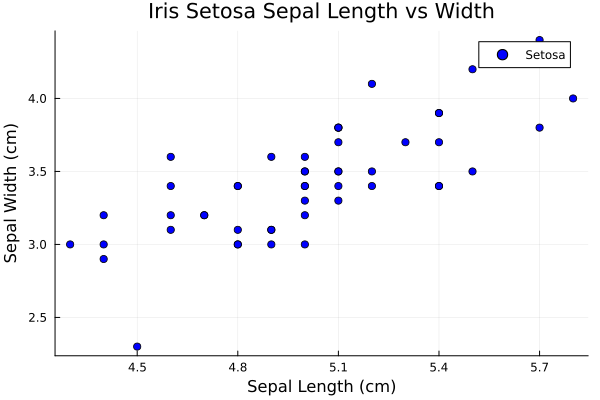

In [12]:
using Plots
# Plot sepal_length vs sepal_width for first group
scatter(df2[1][!,:sepal_length], df2[1][!,:sepal_width],
        title="Iris Setosa Sepal Length vs Width",
        xlabel="Sepal Length (cm)",
        ylabel="Sepal Width (cm)",
        label="Setosa",
        legend=:topright,
        color=:blue)


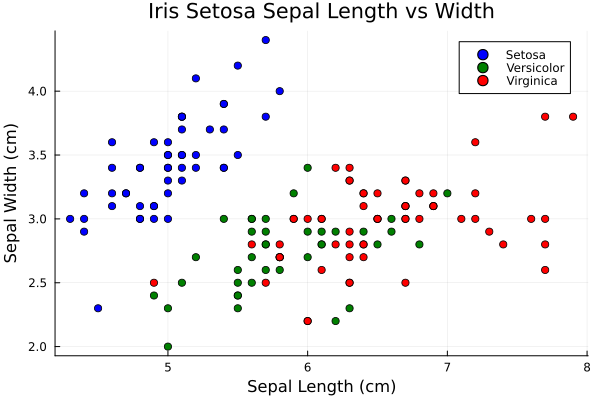

In [ ]:
# Plot sepal_length vs sepal_width for all groups
scatter(df2[1][!,:sepal_length], df2[1][!,:sepal_width],
        title="Iris Setosa Sepal Length vs Width",
        xlabel="Sepal Length (cm)",
        ylabel="Sepal Width (cm)",
        label="Setosa",
        legend=:topright,
        color=:blue)
scatter!(df2[2][!,:sepal_length], df2[2][!,:sepal_width],
         label="Versicolor",
         color=:green)
scatter!(df2[3][!,:sepal_length], df2[3][!,:sepal_width],
         label="Virginica",
         color=:red)

# scatter is a point plot, all plot will be displayed in one plot pane with scatter! function

In [ ]:
using Statistics

# Calculate mean of sepal_length for each species
mean_sepal_length = combine(groupby(df, :species), :sepal_length => mean)
# :sepal_length => mean is a function that calculates mean of sepal_length for each group


Row,species,sepal_length_mean
,String15,Float64
1,Setosa,5.006
2,Versicolor,5.936
3,Virginica,6.588


   Resolving package versions...
  No Changes to `C:\Users\ratta\OneDrive - Prince of Songkla University\PSU Lectures\240-316 Experiencing Advance Technologies in Computer Engineering\ws_julia\Project.toml`
  No Changes to `C:\Users\ratta\OneDrive - Prince of Songkla University\PSU Lectures\240-316 Experiencing Advance Technologies in Computer Engineering\ws_julia\Manifest.toml`


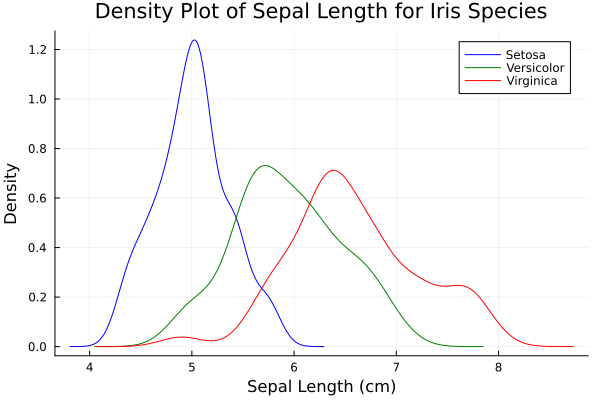

In [17]:
Pkg.add("StatsPlots"); 
using StatsPlots

# create new plot pane
plot() # create a new plot pane

#density plot of sepal_length for all groups
density!(df2[1][!,:sepal_length], label="Setosa", color=:blue)
density!(df2[2][!,:sepal_length], label="Versicolor", color=:green)
density!(df2[3][!,:sepal_length], label="Virginica", color=:red)

# label axes and title
xlabel!("Sepal Length (cm)")
ylabel!("Density")
title!("Density Plot of Sepal Length for Iris Species")

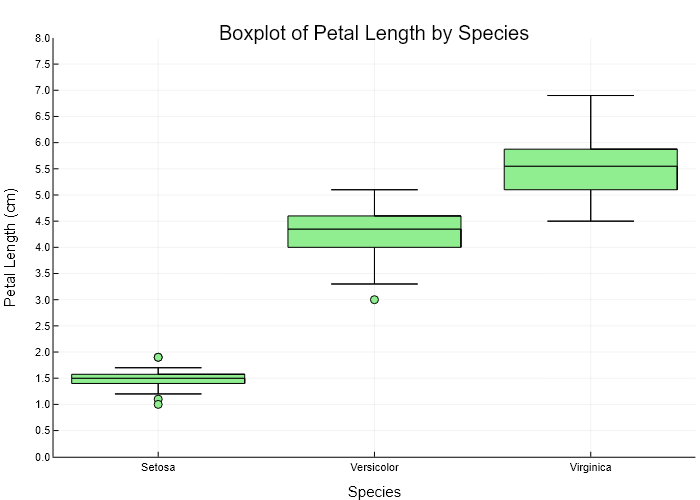

In [96]:
# Show boxplot of petal_length for each species
df_temp = select(df, :species, :petal_length) # select columns species and petal_length from df
boxplot(df_temp.species, df_temp.petal_length,
    title="Boxplot of Petal Length by Species",
    xlabel="Species",
    ylabel="Petal Length (cm)",
    legend=false,
    color=:lightgreen,
    ylim=(0, 8),
    yticks=0:0.5:8,   # set y-axis ticks with 0.5 step
    size=(600, 600))  # enlarge plot pane vertically


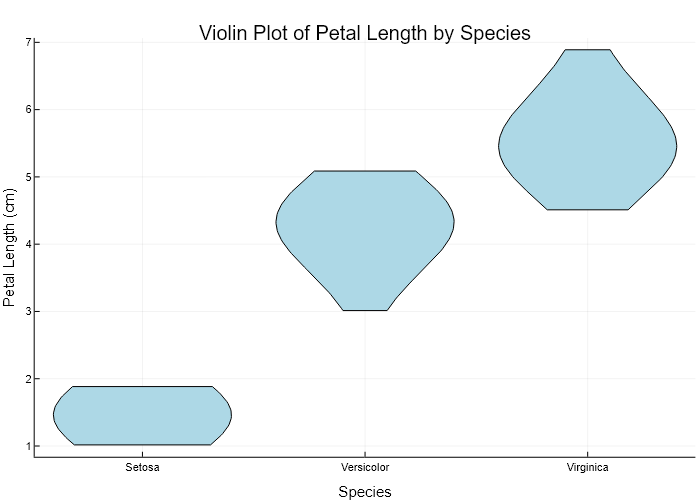

In [97]:
# violin plot of petal_length for each species
plot()
violin(df_temp.species, df_temp.petal_length,
    title="Violin Plot of Petal Length by Species",
    xlabel="Species",
    ylabel="Petal Length (cm)",
    legend=false,
    color=:lightblue,
    size=(600, 600))
# Save the plot to a file
# savefig("iris_petal_length_violin_plot.png")


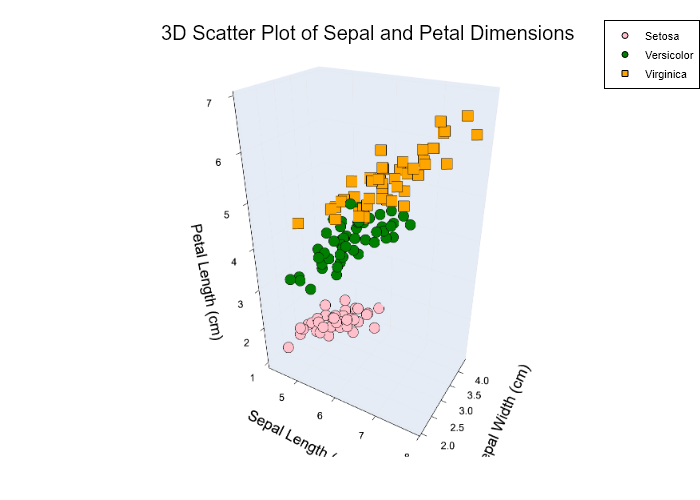

In [84]:
# 3D plot of sepal_length, sepal_width, and petal_length with plots of each species
# 3D scatter plot for each species with different colors
plot()
StatsPlots.scatter3d!(df2[1][!,:sepal_length], df2[1][!,:sepal_width], df2[1][!,:petal_length],
    label="Setosa", color=:pink, marker=:circle, markersize=3)
StatsPlots.scatter3d!(df2[2][!,:sepal_length], df2[2][!,:sepal_width], df2[2][!,:petal_length],
    label="Versicolor", color=:green, marker=:circle, markersize=3)
StatsPlots.scatter3d!(df2[3][!,:sepal_length], df2[3][!,:sepal_width], df2[3][!,:petal_length],
    label="Virginica", color=:orange, marker=:rect, markersize=3)
title!("3D Scatter Plot of Sepal and Petal Dimensions")
xlabel!("Sepal Length (cm)")
ylabel!("Sepal Width (cm)")
zlabel!("Petal Length (cm)")

# adjust size of the plot
plot!(size=(800, 600)) # set size of the plot



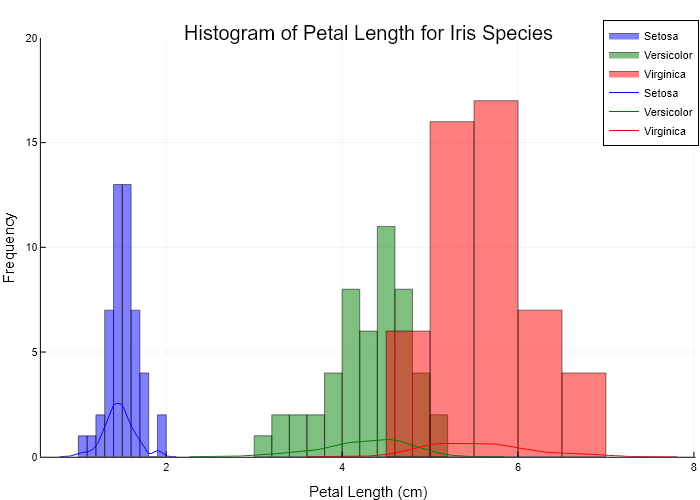

In [107]:
# Histogram of petal_length for each species
plot()
histogram!(df2[1][!,:petal_length], label="Setosa", color=:blue, alpha=0.5, bins=10)
histogram!(df2[2][!,:petal_length], label="Versicolor", color=:green, alpha=0.5, bins=10)
histogram!(df2[3][!,:petal_length], label="Virginica", color=:red, alpha=0.5, bins=10)
xlabel!("Petal Length (cm)")
ylabel!("Frequency")
title!("Histogram of Petal Length for Iris Species")

# plot smoothed distribution of petal_length for each species
density!(df2[1][!,:petal_length], label="Setosa", color=:blue)
density!(df2[2][!,:petal_length], label="Versicolor", color=:green)
density!(df2[3][!,:petal_length], label="Virginica", color=:red)

# adjust size and y-axis limits of the plot
plot!(size=(800, 600), ylim=(0, 20))

